PART ONE

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np


In [2]:
boston = load_boston()

boston_data = pd.DataFrame(boston.data)      # Features
boston_data.columns = boston.feature_names  # Fix Column Names

boston_targets = pd.DataFrame(boston.target)  #Target Value
boston_targets.columns = ['Median Value']     

boston_full = boston_data.copy()
boston_full["Median Value"] = boston_targets.values   #Create Full Dataset With Target Values
boston_full.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
print(boston_full.isnull().sum())
print("Missing Value Count : " , boston_full.isnull().sum().sum())

CRIM            0
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
Median Value    0
dtype: int64
Missing Value Count :  0


(array([ 2.,  1.,  1.,  0.,  5.,  2.,  1.,  6.,  3.,  0.,  3.,  3.,  5.,
         3.,  4.,  6.,  3.,  5., 14.,  9.,  9.,  6., 11.,  8.,  6.,  8.,
         6., 10.,  9.,  9., 15., 13., 20., 16., 19., 10., 14., 19., 13.,
        15., 21., 16.,  9., 12., 14.,  1.,  0.,  4.,  5.,  2.,  6.,  5.,
         5.,  4.,  3.,  6.,  2.,  3.,  4.,  3.,  4.,  3.,  6.,  2.,  1.,
         1.,  5.,  3.,  1.,  4.,  1.,  3.,  1.,  1.,  1.,  0.,  0.,  1.,
         0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  0.,  1.,  1.,  0.,
         1.,  1.,  0.,  0.,  0.,  2.,  1.,  0., 16.]),
 array([ 5.  ,  5.45,  5.9 ,  6.35,  6.8 ,  7.25,  7.7 ,  8.15,  8.6 ,
         9.05,  9.5 ,  9.95, 10.4 , 10.85, 11.3 , 11.75, 12.2 , 12.65,
        13.1 , 13.55, 14.  , 14.45, 14.9 , 15.35, 15.8 , 16.25, 16.7 ,
        17.15, 17.6 , 18.05, 18.5 , 18.95, 19.4 , 19.85, 20.3 , 20.75,
        21.2 , 21.65, 22.1 , 22.55, 23.  , 23.45, 23.9 , 24.35, 24.8 ,
        25.25, 25.7 , 26.15, 26.6 , 27.05, 27.5 , 27.95, 28.4 , 28.85,
        

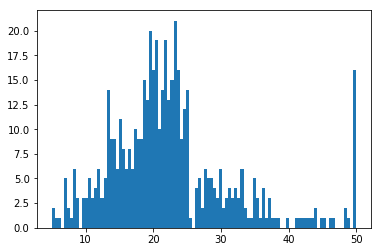

In [4]:
plt.hist(boston_full["Median Value"] , bins = 100)

In [5]:
# print("Before Drop : " , boston_full.shape)
# boston_full = boston_full[boston_full['Median Value'] != boston_full['Median Value'].max()]
# print("After Drop : " , boston_full.shape)
# plt.hist(boston_full["Median Value"] , bins = 100)

In [6]:
eighty_percent = int((80 * boston_full.shape[0]) / 100)  # 404
twenty_percent = boston_full.shape[0] - eighty_percent  # 102

boston_full = boston_full.sample(frac = 1)

boston_x = boston_full.drop(["Median Value"] , axis = 1 , inplace = False)

x_train = boston_x[:eighty_percent]
y_train = boston_full[["Median Value"]][:eighty_percent]

x_test = boston_x[eighty_percent:]
y_test = boston_full[["Median Value"]][eighty_percent:]

print("x train : " ,x_train.shape , end = " ")
print("y train : " ,y_train.shape)
print("x test : " ,x_test.shape , end = " ")
print("y test : " ,y_test.shape)


x train :  (404, 13) y train :  (404, 1)
x test :  (102, 13) y test :  (102, 1)


PART TWO

In [7]:
boston_full.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median Value
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


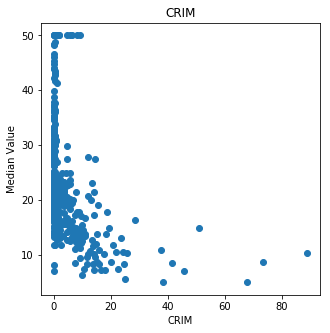

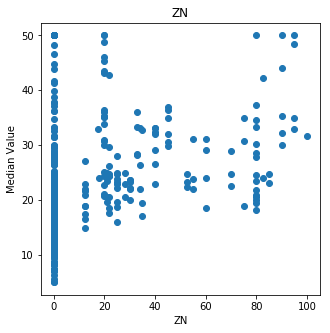

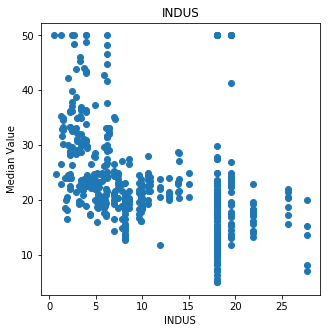

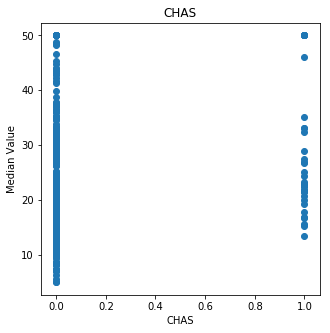

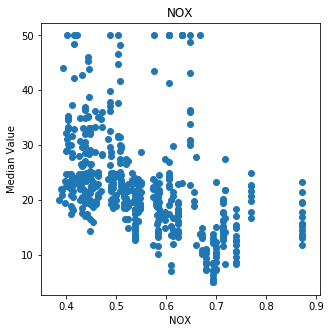

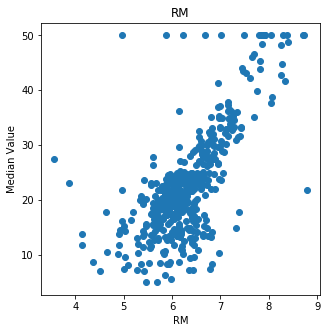

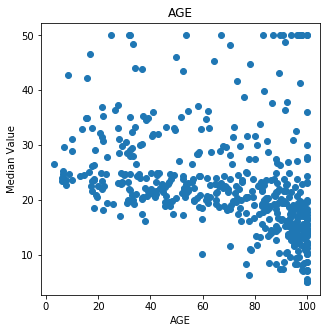

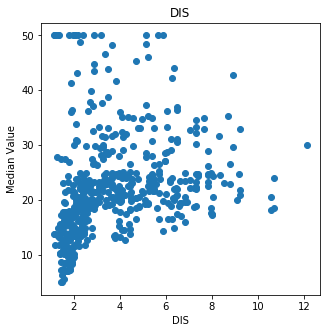

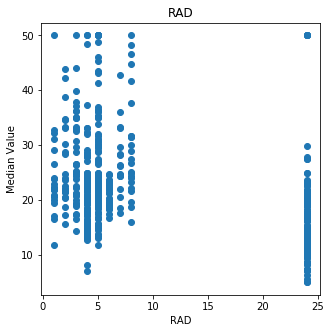

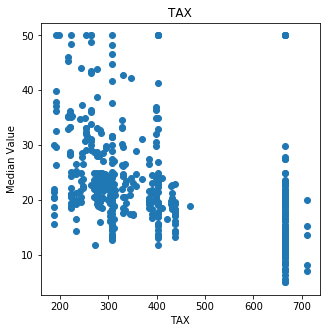

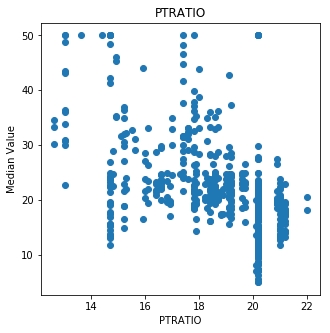

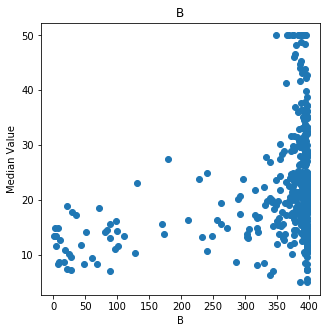

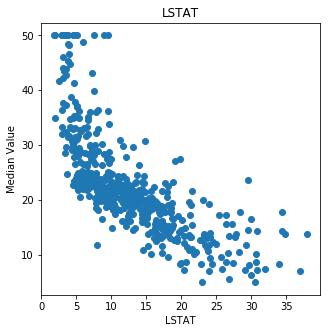

In [8]:
for i, col in enumerate(boston.feature_names):
        plt.figure(figsize=(5, 5))
        plt.scatter(boston_full[col], boston_full["Median Value"])
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('Median Value')
plt.show()

PART THREE

In [9]:
def get_theta(x, y):
    y = np.mat(y)
    theta = np.dot(np.linalg.pinv(np.dot(x.T, x)), (np.dot(x.T, y)))
    return theta

def predict(x, theta):
    return np.dot(x, theta)

In [10]:
x_train_linear = x_train.copy()
x_train_linear_ones = np.hstack((x_train_linear, np.ones((x_train_linear.shape[0], 1))))
x_train_linear_ones.shape

(404, 14)

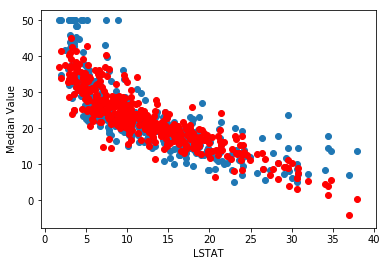

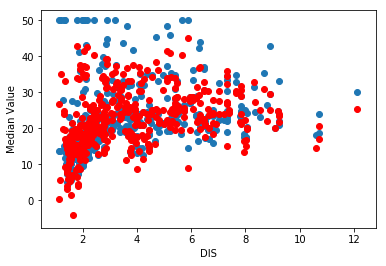

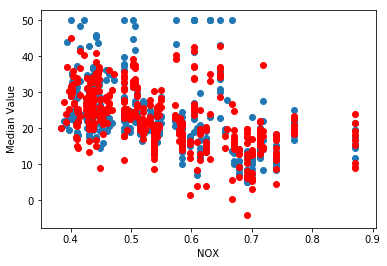

In [11]:
thetas_linear = get_theta(x_train_linear_ones, y_train)
prediction_linear = pd.DataFrame(predict(x_train_linear_ones, thetas_linear))

plt.figure()
plt.scatter(x_train["LSTAT"], y_train)
plt.scatter(x_train["LSTAT"],prediction_linear , color="red")
plt.xlabel("LSTAT")
plt.ylabel('Median Value')
plt.show()

plt.figure()
plt.scatter(x_train["DIS"], y_train)
plt.scatter(x_train["DIS"], prediction_linear, color="red")
plt.xlabel("DIS")
plt.ylabel('Median Value')
plt.show()

plt.figure()
plt.scatter(x_train["NOX"], y_train)
plt.scatter(x_train["NOX"], prediction_linear, color="red")
plt.xlabel("NOX")
plt.ylabel('Median Value')
plt.show()

PART FOUR

In [12]:
x_train_second_order = np.hstack((np.mat(np.multiply(x_train_linear, x_train_linear)), x_train_linear_ones))
print(x_train_second_order.shape)
pd.DataFrame(x_train_second_order).head()

(404, 27)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.016274,900.00,24.3049,0.0,0.183184,40.870449,60.84,49.498260,36.0,90000.0,...,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19,1.0
1,0.012159,625.00,26.3169,0.0,0.205209,41.679936,4596.84,52.207850,64.0,80656.0,...,0.453,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73,1.0
2,0.004412,0.00,16.4025,0.0,0.260100,47.059600,5535.36,8.498974,25.0,87616.0,...,0.510,6.860,74.4,2.9153,5.0,296.0,16.6,391.27,6.92,1.0
3,0.001692,625.00,23.6196,0.0,0.181476,45.252529,1122.25,29.167560,16.0,78961.0,...,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29,1.0
4,0.008795,156.25,61.9369,0.0,0.274576,34.680321,1521.00,29.712311,25.0,96721.0,...,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,1.0


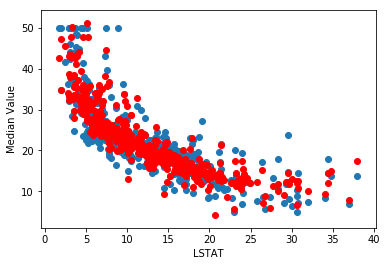

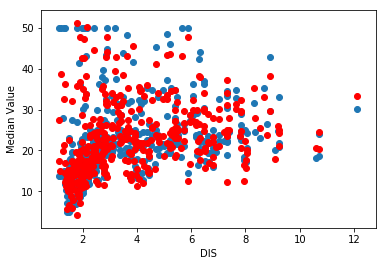

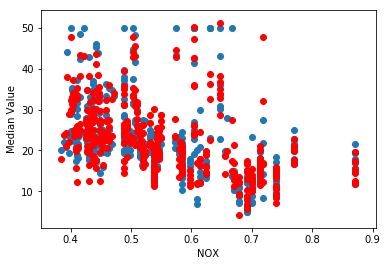

In [13]:
thetas_2nd = get_theta(x_train_second_order, y_train)    
prediction_2nd = pd.DataFrame(predict(x_train_second_order, thetas_2nd))

plt.figure()
plt.scatter(x_train["LSTAT"], y_train)
plt.scatter(x_train["LSTAT"],prediction_2nd , color="red")
plt.xlabel("LSTAT")
plt.ylabel('Median Value')
plt.show()

plt.figure()
plt.scatter(x_train["DIS"], y_train)
plt.scatter(x_train["DIS"], prediction_2nd, color="red")
plt.xlabel("DIS")
plt.ylabel('Median Value')
plt.show()

plt.figure()
plt.scatter(x_train["NOX"], y_train)
plt.scatter(x_train["NOX"], prediction_2nd, color="red")
plt.xlabel("NOX")
plt.ylabel('Median Value')
plt.show()

PART FIVE

In [14]:
x_train_g = x_train.copy()
x_train_data_g = x_train_g.to_numpy()
random_mu = x_train_data_g[np.random.choice(x_train_data_g.shape[0], 10, replace=False)]
random_mu.shape

(10, 13)

In [15]:
def add_new_features(df):
    for i in range(10):
        temp = []
        for j in range(df.shape[0]):
            phi_j = np.exp(-(np.linalg.norm(np.subtract(x_train_data_g[j, :], random_mu[i])) ** 2 )/2)
            temp.append(phi_j)
        new_col = "gaussian " + str(i)
        x_train_g[new_col] = temp

In [16]:
add_new_features(x_train_g)
x_train_g.shape

(404, 23)

In [17]:
ones_g = np.ones((x_train_g.shape[0], 1))
x_train_g['ones'] = ones_g
x_train_g.shape

(404, 24)

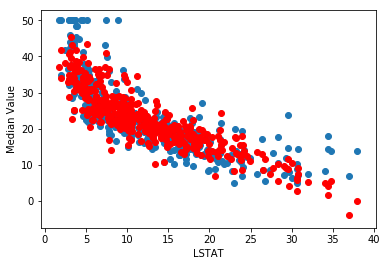

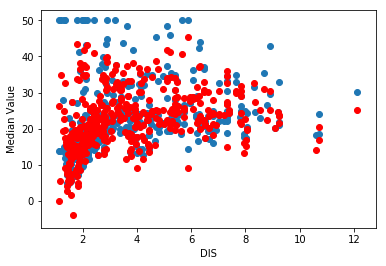

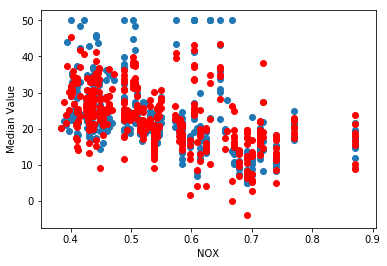

In [18]:
x_train_gaussian = x_train_g.to_numpy()
theta_g = get_theta(x_train_gaussian, y_train)
prediction_gauss =pd.DataFrame(predict(x_train_gaussian, theta_g))


plt.figure()
plt.scatter(x_train["LSTAT"], y_train)
plt.scatter(x_train["LSTAT"],prediction_gauss , color="red")
plt.xlabel("LSTAT")
plt.ylabel('Median Value')
plt.show()

plt.figure()
plt.scatter(x_train["DIS"], y_train)
plt.scatter(x_train["DIS"], prediction_gauss, color="red")
plt.xlabel("DIS")
plt.ylabel('Median Value')
plt.show()

plt.figure()
plt.scatter(x_train["NOX"], y_train)
plt.scatter(x_train["NOX"], prediction_gauss, color="red")
plt.xlabel("NOX")
plt.ylabel('Median Value')
plt.show()

PART SIX

In [19]:
x_test_linear = x_test.copy()
x_test_linear_ones = np.hstack((x_test_linear, np.ones((x_test_linear.shape[0], 1))))
prediction_linear_test = pd.DataFrame(predict(x_test_linear_ones, thetas_linear))
prediction_linear_test.shape

(102, 1)

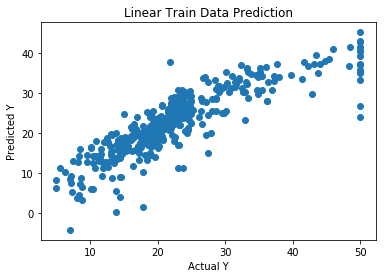

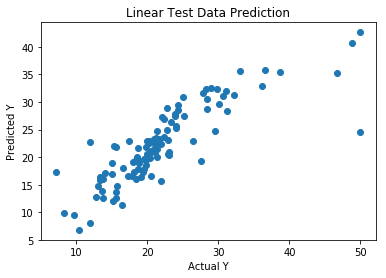

Linear Reg Train Data MSE :  22.798417830717238
Linear Reg Test Data MSE :  19.02272326894926


In [20]:
plt.figure()
plt.scatter(y_train,prediction_linear)
plt.title("Linear Train Data Prediction")
plt.xlabel("Actual Y")
plt.ylabel('Predicted Y')
plt.show()



plt.figure()
plt.scatter(y_test,prediction_linear_test)
plt.title("Linear Test Data Prediction")
plt.xlabel("Actual Y")
plt.ylabel('Predicted Y')
plt.show()

print("Linear Reg Train Data MSE : " , np.square(y_train.to_numpy() - prediction_linear.to_numpy()).mean())
print("Linear Reg Test Data MSE : " , np.square(y_test.to_numpy() - prediction_linear_test.to_numpy()).mean())

In [21]:
x_test_second_order = np.hstack((np.mat(np.multiply(x_test_linear, x_test_linear)), x_test_linear_ones))   
prediction_2nd_test = pd.DataFrame(predict(x_test_second_order, thetas_2nd))
prediction_2nd_test.shape

(102, 1)

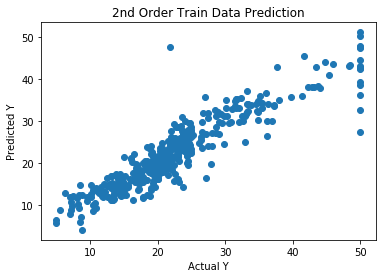

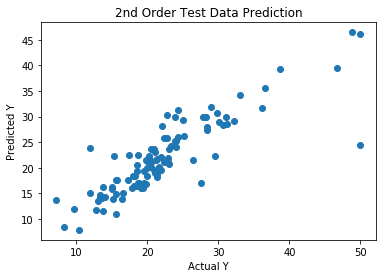

2nd Order Reg Train Data MSE :  14.138239820932593
2nd Order Reg Test Data MSE :  16.58342200217141


In [22]:
plt.figure()
plt.scatter(y_train,prediction_2nd)
plt.title("2nd Order Train Data Prediction")
plt.xlabel("Actual Y")
plt.ylabel('Predicted Y')
plt.show()


plt.figure()
plt.scatter(y_test,prediction_2nd_test)
plt.title("2nd Order Test Data Prediction")
plt.xlabel("Actual Y")
plt.ylabel('Predicted Y')
plt.show()

print("2nd Order Reg Train Data MSE : " , np.square(y_train.to_numpy() - prediction_2nd.to_numpy()).mean())
print("2nd Order Reg Test Data MSE : " ,np.square(y_test.to_numpy() - prediction_2nd_test.to_numpy()).mean())

In [23]:
x_test_g = x_test.copy()
x_test_data_g = x_test_g.to_numpy()
random_mu_test = x_test_data_g[np.random.choice(x_test_data_g.shape[0], 10, replace=False)]

def add_new_features(df):
    for i in range(10):
        temp = []
        for j in range(df.shape[0]):
            phi_j = np.exp(-(np.linalg.norm(np.subtract(x_test_data_g[j, :], random_mu_test[i])) ** 2 )/2)
            temp.append(phi_j)
        new_col = "gaussian " + str(i)
        x_test_g[new_col] = temp
        
add_new_features(x_test_g)
ones_g_test = np.ones((x_test_g.shape[0], 1))
x_test_g['ones'] = ones_g_test
x_test_g.shape
x_test_gaussian = x_test_g.to_numpy()
prediction_gauss_test =pd.DataFrame(predict(x_test_gaussian, theta_g))
prediction_gauss_test.shape

(102, 1)

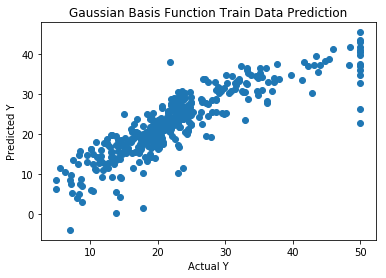

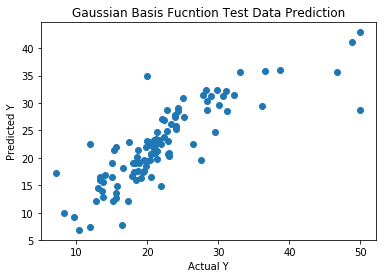

Gaussian Basis Function Reg Train Data MSE:  22.181725737302514
Gaussian Basis Function Reg Test Data MSE:  19.981013006862646


In [24]:
plt.figure()
plt.scatter(y_train,prediction_gauss)
plt.title("Gaussian Basis Function Train Data Prediction")
plt.xlabel("Actual Y")
plt.ylabel('Predicted Y')
plt.show()


plt.figure()
plt.scatter(y_test,prediction_gauss_test)
plt.title("Gaussian Basis Fucntion Test Data Prediction")
plt.xlabel("Actual Y")
plt.ylabel('Predicted Y')
plt.show()

print("Gaussian Basis Function Reg Train Data MSE: " , np.square(y_train.to_numpy() - prediction_gauss.to_numpy()).mean())
print("Gaussian Basis Function Reg Test Data MSE: " , np.square(y_test.to_numpy() - prediction_gauss_test.to_numpy()).mean())